<a href="https://colab.research.google.com/github/KDawid/pornDataVisualization/blob/master/dataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Importing libraries")
import csv
import operator
from enum import Enum
import re
import os
import requests
import sys

import statistics as stat
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!pip install wordcloud
!pip install stemming

from wordcloud import WordCloud, STOPWORDS 
from stemming.porter2 import stem

from PIL import Image
from io import BytesIO
import random
from __future__ import print_function

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

import seaborn as sn

!pip install squarify
import matplotlib.pyplot as plt 
import squarify

np.random.seed(1)

print("Importing was successful!")

Importing libraries
Importing was successful!


In [0]:
print("Git pull dataset")
!git clone https://github.com/atis06/not_that_dataset.git
print("Git pull done")

Git pull dataset
fatal: destination path 'not_that_dataset' already exists and is not an empty directory.
Git pull done


Importing libraries used in the project! 

In [0]:
print("Declaring variables")

class Quality(Enum):
  LOW = 'LOW'
  HD = 'HD'

ids = []
imgSources = []
lengths = []
numberOfViews = []
qualities = []
titles = []
videoLinks = []
votings = []
categories = []
tags = []

print("Declaration was sussessful!")

Declaring variables
Declaration was sussessful!


Declaring variables, which are used as a list for storing values from CSV.

In [0]:
print("Reading data")
with open('not_that_dataset/tumbzilla_labels.csv') as csvfile:
  data = csv.reader(csvfile, delimiter=',')
  next(data) #skip header
  for row in data:
    ids.append(int(row[0]))
    imgSources.append(row[1])
    lengths.append(int(float(row[2])))
    numberOfViews.append(int(float(row[3])))
    qualities.append(Quality(row[4]))
    titles.append(row[5])
    videoLinks.append(row[6])
    votings.append(float(row[7]))
    categories.append(row[8])
    tags.append(row[9])
    
print("Reading data was successful!")

Reading data
Reading data was successful!


Filling those lists with relevant values. 

In [0]:
print("Collecting categories")
categorySet = set()
for i in categories:
  x = i.split("__")
  for j in x:
    if len(j.strip()) > 0:
      categorySet.add(j.strip())

print("\t",len(categorySet), "category was found")
#for i in sorted(categorySet):
#  print(i)

print("Collecting was successful!")

	 85 category was found


Collect every possible category from tags on videos. 

In [0]:
categoryDictionary = dict()
for cat in categorySet:
  categoryDictionary[cat] = 0
  for i in categories:
    if cat in i:
      categoryDictionary[cat] += 1

x = 0
for i in sorted(categoryDictionary.items(), key=operator.itemgetter(1), reverse=True):
  if(i[1] > 1000):
    x += 1
  print("\t", i[1],"\t", i[0])
print(x, "big categories were found")

f = open('categories.csv','w')
f.write("name,number_of_occurences\n")
for i in sorted(categoryDictionary.items(), key=operator.itemgetter(1), reverse=True):
  if i[1] >= 1000:
    f.write(i[0]+","+str(i[1])+"\n")
f.close()

	 67793 	 HD
	 66337 	 Pornstar
	 45602 	 Amateur
	 36217 	 Teen
	 25457 	 Big Tits
	 20145 	 Anal
	 19573 	 Babe
	 18496 	 Hardcore
	 15767 	 MILF
	 14553 	 Brunette
	 14240 	 POV
	 13544 	 Blonde
	 13284 	 Threesome
	 13008 	 Small Tits
	 11080 	 Big Dick
	 10609 	 Masturbation
	 10464 	 Toys
	 10247 	 Blowjob
	 10030 	 Big Ass
	 9654 	 Lesbian
	 9562 	 Verified Amateurs
	 9481 	 Exclusive
	 8679 	 Asian
	 7469 	 Reality
	 7390 	 Orgy
	 6705 	 Interracial
	 6644 	 Euro
	 6341 	 Rough Sex
	 5775 	 Cumshots
	 5384 	 Fetish
	 5335 	 Ebony
	 5308 	 Public
	 5137 	 Webcam
	 4891 	 Compilation
	 4826 	 Double Penetration
	 4676 	 Red Head
	 4392 	 Latina
	 3493 	 Mature
	 3337 	 Creampie
	 3308 	 Japanese
	 3299 	 Gangbang
	 3246 	 Squirt
	 2547 	 Striptease
	 2508 	 For Women
	 2389 	 Bondage
	 2367 	 Uniforms
	 2180 	 Massage
	 1941 	 Vintage
	 1896 	 Pussy Licking
	 1640 	 Party
	 1357 	 Handjob
	 1317 	 Casting
	 1293 	 German
	 1220 	 College
	 1074 	 British
	 1062 	 Indian
	 1044 	 

Using dictionaries for setting up the # of videos in each category. 

In [0]:
print("Collecting tags")
tagSet = set()
for i in tags:
  x = i.split("__")
  for j in x:
    tagSet.add(j.strip().strip('-').strip('.'))

print(len(tagSet))
f = open('tags.txt','w')
for i in sorted(tagSet):
  f.write(i+"\n")
#It has too many values, maybe we should remove it
print("Collecting was successful!")

51677


Collecting different tags encountered on videos. 

In [0]:
#for i in titles:
 # print(i)

#Histograms

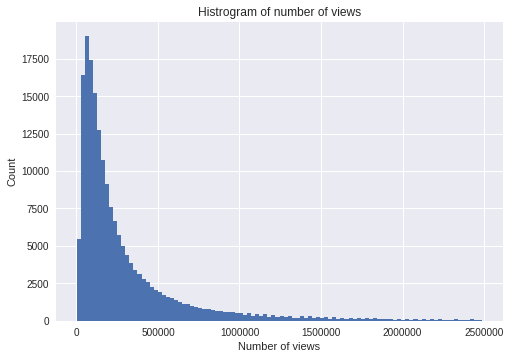

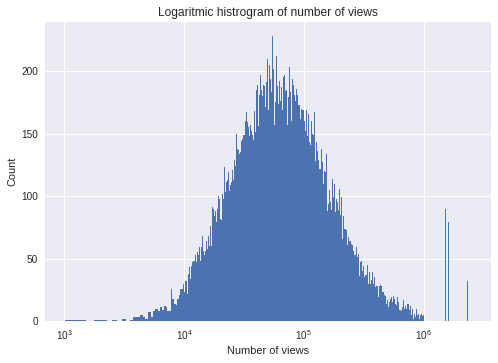

In [0]:
x = [x for x in numberOfViews if x<2500000]
plt.hist(x, bins=100)
plt.title('Histrogram of number of views')
plt.xlabel('Number of views')
plt.ylabel('Count');
plt.show()

# histogram on log scale. 
plt.hist(x, bins=10000)
plt.title('Logaritmic histrogram of number of views')
plt.xlabel('Number of views')
plt.ylabel('Count');
plt.xscale('log')
plt.show()

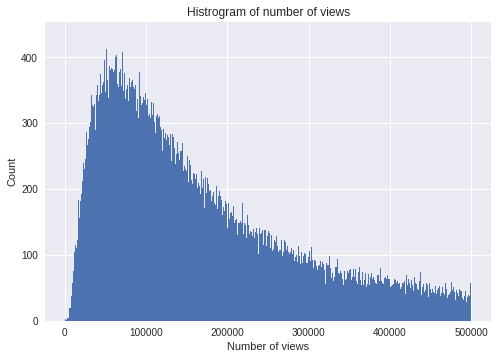

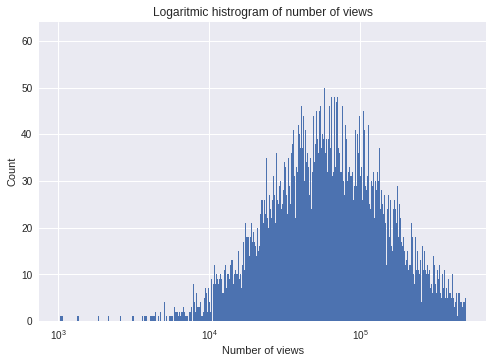

In [0]:
x = [x for x in numberOfViews if x<500000]
plt.hist(x, bins=1000)
plt.title('Histrogram of number of views')
plt.xlabel('Number of views')
plt.ylabel('Count');
plt.show()

# histogram on log scale.
plt.hist(x, bins=10000)
plt.xscale('log')
plt.title('Logaritmic histrogram of number of views')
plt.xlabel('Number of views')
plt.ylabel('Count');
plt.show()

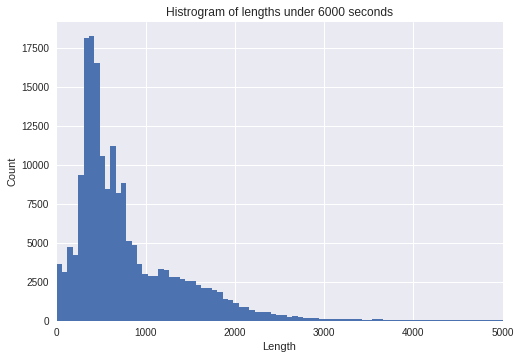

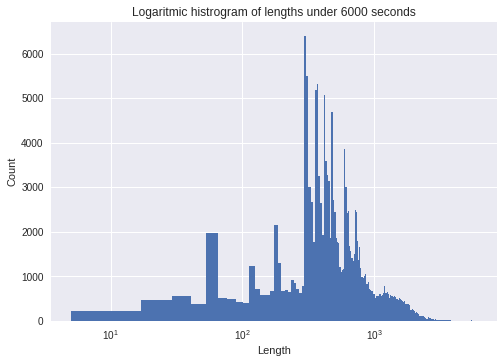

In [0]:
x = [x for x in lengths if x<6000]
plt.hist(x, bins=100)
plt.title('Histrogram of lengths under 6000 seconds')
plt.xlabel('Length')
plt.ylabel('Count');
plt.xlim(0, 5000)
plt.show()

# histogram on log scale.
plt.hist(x, bins=500)
plt.xscale('log')
plt.title('Logaritmic histrogram of lengths under 6000 seconds')
plt.xlabel('Length')
plt.ylabel('Count');
plt.show()

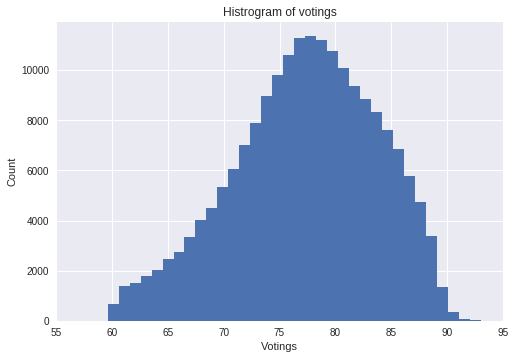

In [0]:
x = votings
plt.hist(x, bins=60)
plt.title('Histrogram of votings')
plt.xlabel('Votings')
plt.ylabel('Count');
plt.xlim(55, 95)
plt.show()

#Clean dataset

In [0]:
x = [x for x in lengths if x<60000]
print(stat.mean(x))
print(stat.stdev(x))

832.7788451999937
791.5233223959685


In [0]:
x = [x for x in lengths if x<60000]
print("avg: " + str(stat.mean(x)))
print("std: " + str(stat.stdev(x)))
avg = stat.mean(x)
std = stat.stdev(x)
i=0

for i in range(1,7):
  removed = len(lengths)-len([x for x in lengths if avg-i*std < x < avg+i*std])
  print(i, "- removed: ", removed)

i = 4
min_length = avg-i*std
max_length = avg+i*std
print("Minimum using %s std: %s" % (i, min_length))
print("Maximum using %s std: %s" % (i, max_length))



avg: 832.7788451999937
std: 791.5233223959685
1 - removed:  23037
2 - removed:  5676
3 - removed:  2780
4 - removed:  1775
5 - removed:  1270
6 - removed:  754
Minimum using 4 std: -2333.3144443838805
Maximum using 4 std: 3998.8721347838678


In [0]:
print("Creating new CSV table")
x=0
f = open('tumbzilla.csv','w')
f.write("id,img_souce,length,views,quality,title,videoLink,voting,tags")
for i in sorted(categoryDictionary.items(), key=operator.itemgetter(1), reverse=True):
  if i[1] > 1000:
    f.write(",category_"+i[0])
f.write("\n")
for id in ids:
  if min_length < lengths[id] < max_length:
    x +=1
    f.write(str(id)+","+imgSources[id]+","+str(lengths[id])+","+str(numberOfViews[id])+","+str(qualities[id])+","+"\""+titles[id].replace("\"", "")+"\""+","+videoLinks[id]+","+str(votings[id])+","+tags[id])
    for i in sorted(categoryDictionary.items(), key=operator.itemgetter(1), reverse=True):
      if i[1] > 1000:
        if i[0] in categories[id]:
          f.write(",1")
        else:
          f.write(",0")
    f.write("\n")
f.close()
print(x)
print("Creating new CSV table was successful!")

Creating new CSV table
189757
Creating new CSV table was successful!


Establishing new CSV file which are filled with list variables and other relevant variables which are cleaned during the processes above. 

#Collect invalid links

In [0]:
'''invalid_links = []

for id in ids:
  r = requests.get(f'{videoLinks[id]}')
  if r.status_code != 200:
    invalid_links.append((id, videoLinks[id]))
    print("")
    print(f'{videoLinks[id]} is invalid!')
  else:
    sys.stdout.write('.')

print(invalid_links)'''

'invalid_links = []\n\nfor id in ids:\n  r = requests.get(f\'{videoLinks[id]}\')\n  if r.status_code != 200:\n    invalid_links.append((id, videoLinks[id]))\n    print("")\n    print(f\'{videoLinks[id]} is invalid!\')\n  else:\n    sys.stdout.write(\'.\')\n\nprint(invalid_links)'

28 of 13000 video links was invalid

#Boxplots

Checking whether the video is still working or not! 

{'boxes': [<matplotlib.lines.Line2D at 0x7f57db951668>],
 'caps': [<matplotlib.lines.Line2D at 0x7f57db9513c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f57db817b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f57db817e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f57db951c18>,
  <matplotlib.lines.Line2D at 0x7f57db9514a8>]}

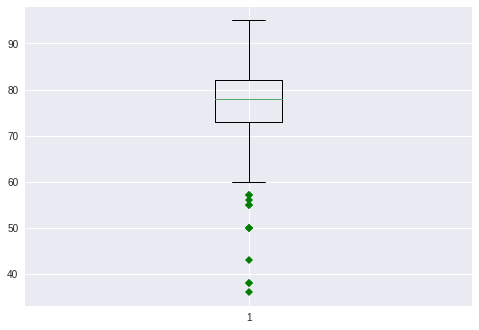

In [0]:
plt.figure()
plt.boxplot(votings, 0, 'gD')

123247


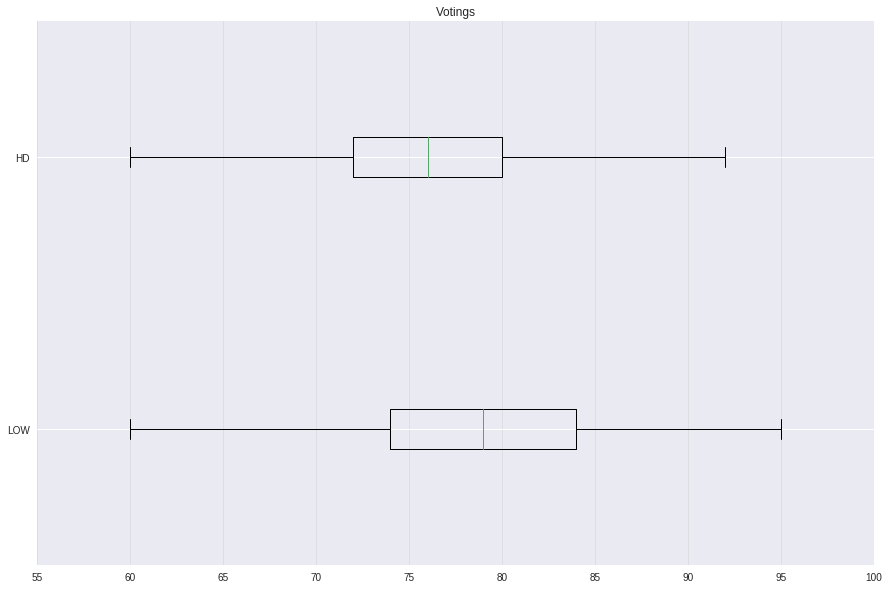

In [0]:
low_votes = [votings[i] for i in ids if qualities[i] == Quality.LOW]
hd_votes = [votings[i] for i in ids if qualities[i] == Quality.HD]

print(len(low_votes))

myList = [low_votes] + [hd_votes]
names = ['LOW', 'HD']
# set fig for boxplots
fig, ax = plt.subplots(sharex=True, figsize=(15, 10))
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.set_axisbelow(True)
ax.set_title('Votings')

for i,l in enumerate(myList):
    ax.boxplot(l, vert=False, positions = [i])

ax.set_yticks(range(len(myList)))
ax.set_yticklabels(names)

ax.set_xlim(55, 100)
ax.set_ylim(-0.5, len(myList)-0.5)

plt.show()

In [0]:
print("Votings of low quality videos:\tmean: %s,\tmedian: %s,\t std: %s" % ("{0:.2f}".format(stat.mean(low_votes)), "{0:.2f}".format(stat.median(low_votes)), "{0:.2f}".format(stat.stdev(low_votes))))
print("Votings of HD quality videos:\tmean: %s,\tmedian: %s,\t std: %s" % ("{0:.2f}".format(stat.mean(hd_votes)), "{0:.2f}".format(stat.median(hd_votes)), "{0:.2f}".format(stat.stdev(hd_votes))))

Votings of low quality videos:	mean: 78.33,	median: 79.00,	 std: 6.89
Votings of HD quality videos:	mean: 75.94,	median: 76.00,	 std: 5.76


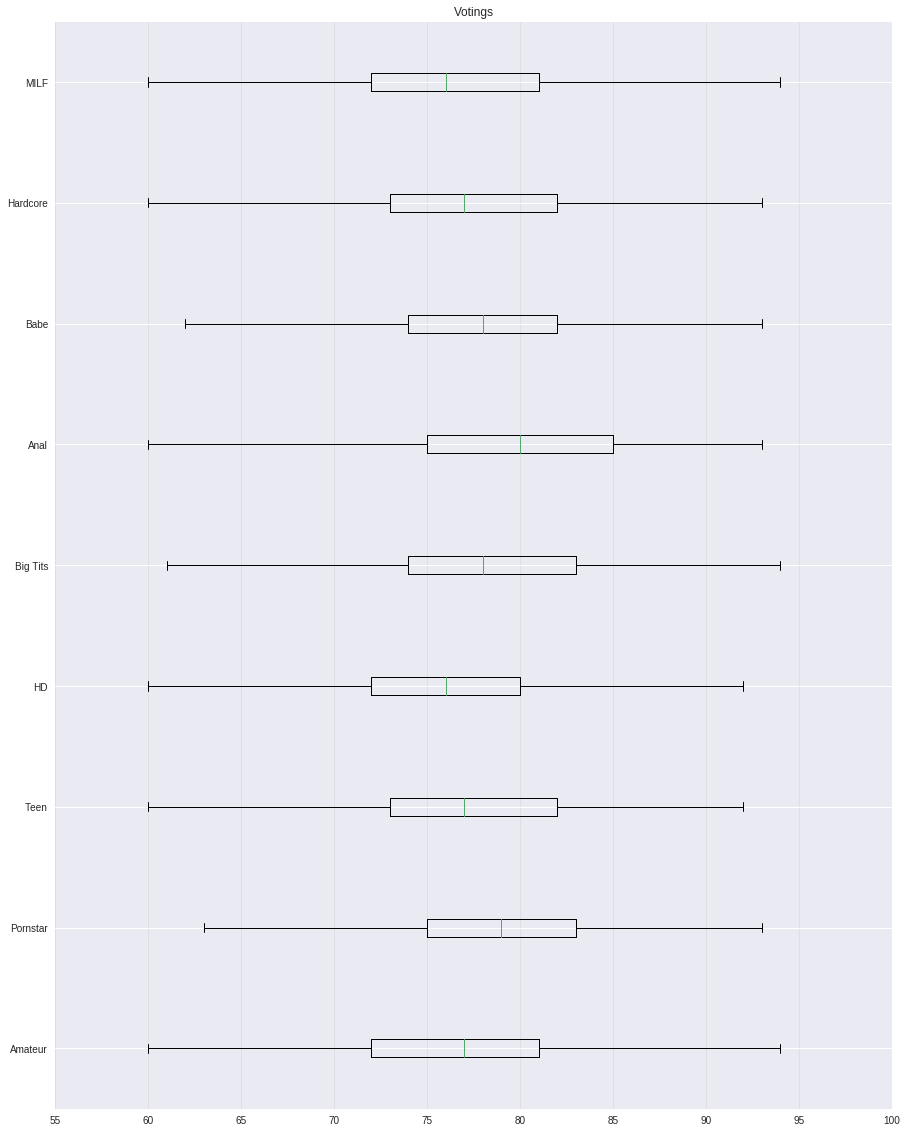

Votings of Amateur videos:
	mean: 76.30,	median: 77.00,	 std: 6.82
Votings of Pornstar videos:
	mean: 78.79,	median: 79.00,	 std: 5.93
Votings of Teen videos:
	mean: 77.00,	median: 77.00,	 std: 6.47
Votings of HD videos:
	mean: 75.95,	median: 76.00,	 std: 5.76
Votings of Big Tits videos:
	mean: 78.21,	median: 78.00,	 std: 6.46
Votings of Anal videos:
	mean: 79.50,	median: 80.00,	 std: 6.32
Votings of Babe videos:
	mean: 77.49,	median: 78.00,	 std: 6.00
Votings of Hardcore videos:
	mean: 77.25,	median: 77.00,	 std: 6.52
Votings of MILF videos:
	mean: 76.21,	median: 76.00,	 std: 6.29


In [0]:
amateur_votes = [votings[i] for i in ids if "Amateur" in categories[i]]
pronstar_votes = [votings[i] for i in ids if "Pornstar" in categories[i]]
teen_votes = [votings[i] for i in ids if "Teen" in categories[i]]
hd_votes = [votings[i] for i in ids if "HD" in categories[i]]
big_tits_votes = [votings[i] for i in ids if "Big Tits" in categories[i]]
anal_votes = [votings[i] for i in ids if "Anal" in categories[i]]
babe_votes = [votings[i] for i in ids if "Babe" in categories[i]]
hardcore_votes = [votings[i] for i in ids if "Hardcore" in categories[i]]
milf_votes = [votings[i] for i in ids if "MILF" in categories[i]]

myList = [amateur_votes] + [pronstar_votes] + [teen_votes] + [hd_votes] + [big_tits_votes] + [anal_votes] + [babe_votes] + [hardcore_votes] + [milf_votes]
names = ['Amateur', 'Pornstar', 'Teen', 'HD', 'Big Tits', 'Anal', 'Babe', 'Hardcore', 'MILF']
# set fig for boxplots
fig, ax = plt.subplots(sharex=True, figsize=(15, 20))
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.set_axisbelow(True)
ax.set_title('Votings')

for i,l in enumerate(myList):
    ax.boxplot(l, vert=False, positions = [i])

ax.set_yticks(range(len(myList)))
ax.set_yticklabels(names)

ax.set_xlim(55, 100)
ax.set_ylim(-0.5, len(myList)-0.5)

plt.show()

for i in range(0, len(myList)):
  print("Votings of %s videos:\n\tmean: %s,\tmedian: %s,\t std: %s" % (names[i], "{0:.2f}".format(stat.mean(myList[i])), "{0:.2f}".format(stat.median(myList[i])), "{0:.2f}".format(stat.stdev(myList[i]))))

67728
557
65
123182


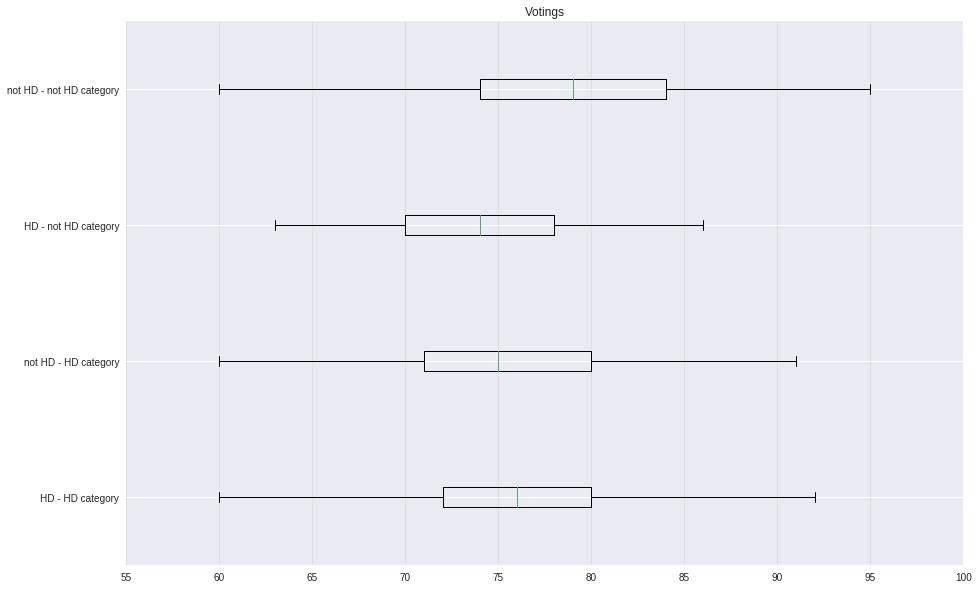

Votings of HD - HD category videos:
	mean: 75.95,	median: 76.00,	 std: 5.76
Votings of not HD - HD category videos:
	mean: 75.26,	median: 75.00,	 std: 6.32
Votings of HD - not HD category videos:
	mean: 74.26,	median: 74.00,	 std: 6.87
Votings of not HD - not HD category videos:
	mean: 78.33,	median: 79.00,	 std: 6.89


In [0]:
hd_hds = [votings[i] for i in ids if "HD" in categories[i] and qualities[i] == Quality.HD]
nothd_hds = [votings[i] for i in ids if "HD" not in categories[i] and qualities[i] == Quality.HD]
hd_nothds = [votings[i] for i in ids if "HD" in categories[i] and qualities[i] == Quality.LOW]
nothd_nothds = [votings[i] for i in ids if "HD" not in categories[i] and qualities[i] == Quality.LOW]

print(len(hd_hds))
print(len(nothd_hds))
print(len(hd_nothds))
print(len(nothd_nothds))

myList = [hd_hds] + [nothd_hds] + [hd_nothds] + [nothd_nothds]
names = ['HD - HD category', 'not HD - HD category', 'HD - not HD category', 'not HD - not HD category']
# set fig for boxplots
fig, ax = plt.subplots(sharex=True, figsize=(15, 10))
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.set_axisbelow(True)
ax.set_title('Votings')

for i,l in enumerate(myList):
    ax.boxplot(l, vert=False, positions = [i])

ax.set_yticks(range(len(myList)))
ax.set_yticklabels(names)

ax.set_xlim(55, 100)
ax.set_ylim(-0.5, len(myList)-0.5)

plt.show()

for i in range(0, len(myList)):
  print("Votings of %s videos:\n\tmean: %s,\tmedian: %s,\t std: %s" % (names[i], "{0:.2f}".format(stat.mean(myList[i])), "{0:.2f}".format(stat.median(myList[i])), "{0:.2f}".format(stat.stdev(myList[i]))))

# Using preprocessed data

In [0]:
print("Reading dataset")
data = pd.read_csv('tumbzilla.csv')
print("Reading was successful")

Reading dataset
Reading was successful


In [0]:
print(data.head(10))

   id                                          img_souce  length    views  \
0   0  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1583   127450   
1   1  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    2501   480620   
2   2  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1513    99720   
3   3  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1710   598820   
4   4  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1694   155850   
5   5  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    2452   737430   
6   6  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1158   146450   
7   7  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1566  3740000   
8   8  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1362   254270   
9   9  http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...    1184   208290   

       quality                                            title  \
0  Quality.LOW                                  Tease then suck   
1  Quality.LOW    

471268
387964
600483
480460
510028


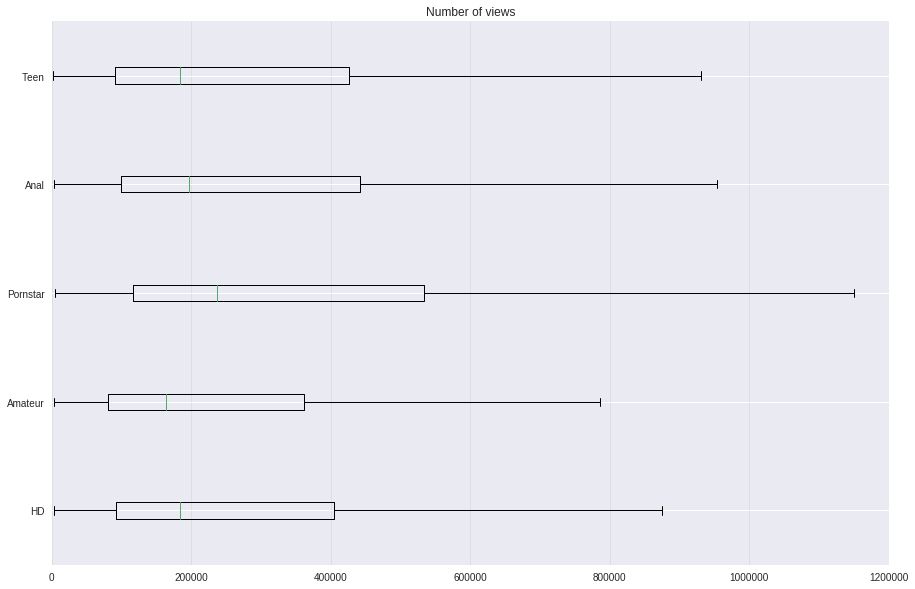

In [0]:
hd_views = [data["views"][i] for i in range(1,len(data["id"])) if data["category_HD"][i] == 1 ]
amateur_views = [data["views"][i] for i in range(1,len(data["id"])) if data["category_Amateur"][i] == 1 ]
pornstar_views = [data["views"][i] for i in range(1,len(data["id"])) if data["category_Pornstar"][i] == 1 ]
anal_views = [data["views"][i] for i in range(1,len(data["id"])) if data["category_Anal"][i] == 1 ]
teen_views = [data["views"][i] for i in range(1,len(data["id"])) if data["category_Teen"][i] == 1 ]

print(stat.mean(hd_views))
print(stat.mean(amateur_views))
print(stat.mean(pornstar_views))
print(stat.mean(anal_views))
print(stat.mean(teen_views))

myList = [hd_views] + [amateur_views] + [pornstar_views] + [anal_views] + [teen_views]
names = ['HD', 'Amateur', 'Pornstar', 'Anal', 'Teen']
# set fig for boxplots
fig, ax = plt.subplots(sharex=True, figsize=(15, 10))
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.set_axisbelow(True)
ax.set_title('Number of views')

for i,l in enumerate(myList):
    ax.boxplot(l, vert=False, positions = [i])

ax.set_yticks(range(len(myList)))
ax.set_yticklabels(names)

ax.set_xlim(0, 1200000)
ax.set_ylim(-0.5, len(myList)-0.5)

plt.show()

#for i in range(0, len(myList)):
#  print("Votings of %s videos:\n\tmean: %s,\tmedian: %s,\t std: %s" % (names[i], "{0:.2f}".format(stat.mean(myList[i])), "{0:.2f}".format(stat.median(myList[i])), "{0:.2f}".format(stat.stdev(myList[i]))))

#Bar charts

In [0]:
#print(list(data))
cats = [(i,stat.mean([data["voting"][j] for j in range(len(data)) if data[i][j] != 0])) for i in list(data) if "category_" in i and sum(data[i]) > 10000]
print(cats)
#print([i[9:] for (i,j) in cats])

#votingsPerCategories = [stat.mean([data["voting"][i] for i in range(len(data["voting"])) if data[cat][i] == 1]) for cat in cats]
#print(votingsPerCategories)

[('category_HD', 75.95121194206325), ('category_Pornstar', 78.80427338720723), ('category_Amateur', 76.31111306992221), ('category_Teen', 77.00300233514956), ('category_Big Tits', 78.23331879633668), ('category_Anal', 79.53001206515182), ('category_Babe', 77.49272896039604), ('category_Hardcore', 77.27870826491517), ('category_MILF', 76.22029355456286), ('category_Brunette', 77.60616509206261), ('category_POV', 77.58228293782128), ('category_Blonde', 77.36342678664386), ('category_Threesome', 76.79341683213686), ('category_Small Tits', 76.34889112124256), ('category_Big Dick', 76.39505274645326), ('category_Masturbation', 78.69772942289498), ('category_Toys', 78.1163528055342), ('category_Blowjob', 77.45475979958739)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

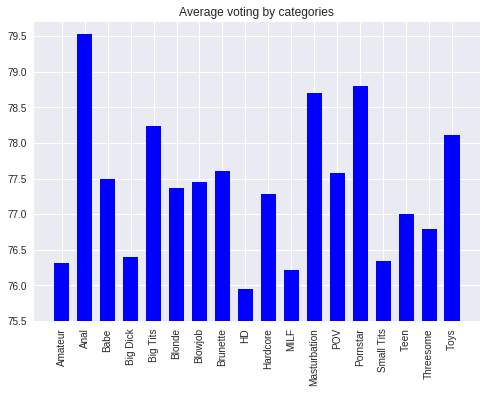

In [0]:
y = [j for (i,j) in cats]
N = len(y)
x = [i[9:] for (i,j) in cats]
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.title("Average voting by categories")
plt.ylim([75.5,79.7])
plt.xticks(rotation=90)

In [0]:
cats_len = [(i,stat.mean([data["length"][j] for j in range(len(data)) if data[i][j] != 0])) for i in list(data) if "category_" in i and sum(data[i]) > 10000]
print(cats_len)


[('category_HD', 702), ('category_Pornstar', 902), ('category_Amateur', 653), ('category_Teen', 767), ('category_Big Tits', 813), ('category_Anal', 971), ('category_Babe', 825), ('category_Hardcore', 819), ('category_MILF', 732), ('category_Brunette', 797), ('category_POV', 697), ('category_Blonde', 797), ('category_Threesome', 945), ('category_Small Tits', 836), ('category_Big Dick', 889), ('category_Masturbation', 609), ('category_Toys', 709), ('category_Blowjob', 646)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

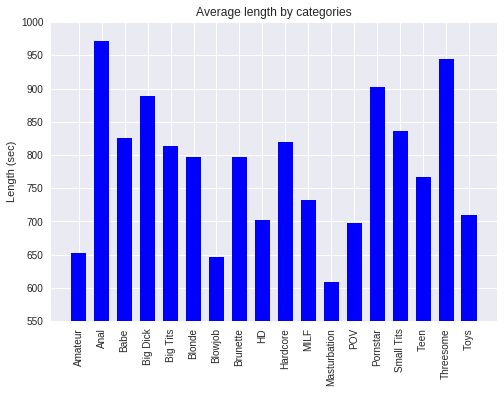

In [0]:
y = [j for (i,j) in cats_len]
N = len(y)
x = [i[9:] for (i,j) in cats_len]
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.title("Average length by categories")
plt.ylabel("Length (sec)")
plt.ylim([550,1000])
plt.xticks(rotation=90)

In [0]:
cats_view = [(i,stat.mean([data["views"][j] for j in range(len(data)) if data[i][j] != 0])) for i in list(data) if "category_" in i and sum(data[i]) > 10000]
print(cats_view)


[('category_HD', 471268), ('category_Pornstar', 600483), ('category_Amateur', 387964), ('category_Teen', 510028), ('category_Big Tits', 470582), ('category_Anal', 480460), ('category_Babe', 449236), ('category_Hardcore', 445719), ('category_MILF', 470926), ('category_Brunette', 437539), ('category_POV', 617794), ('category_Blonde', 382154), ('category_Threesome', 511035), ('category_Small Tits', 423268), ('category_Big Dick', 574846), ('category_Masturbation', 211233), ('category_Toys', 249898), ('category_Blowjob', 384706)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

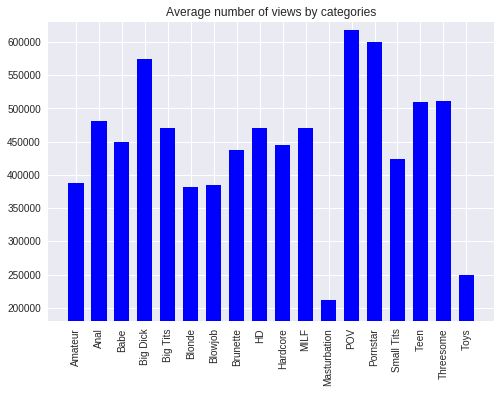

In [0]:
y = [j for (i,j) in cats_view]
N = len(y)
x = [i[9:] for (i,j) in cats_view]
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.title("Average number of views by categories")
plt.ylim([180000,630000])
plt.xticks(rotation=90)

#Word cloud

In [0]:
stopWords = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}


def generate_wordcloud(text):
    wordcloud = WordCloud(relative_scaling = 1.0,
                          stopwords = stopWords, mask=mask).generate(text)
    #plt.figure(figsize=(16,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [0]:
titles = data["title"]
title_words = dict()
for title in titles:
  words = title.split(" ")
  for word in words:
    clean_word = re.sub('[^a-zA-Z]+', '', word)
    clean_word = clean_word.lower()
    if len(clean_word)>2:
      if clean_word in title_words:
        title_words[clean_word] += 1
      else:
        title_words[clean_word] = 1
print("Found %s words in titles" % len(title_words))
#print(sorted(title_words))
 
for key in sorted(title_words):
    if title_words[key] > 2000:
      print("%s: %s" % (key, title_words[key]))


Found 38273 words in titles
amateur: 5650
anal: 8534
and: 25691
asian: 3794
ass: 8613
babe: 5937
big: 11043
black: 6414
blonde: 9637
blowjob: 3764
brunette: 5312
busty: 5273
cock: 12017
compilation: 2210
creampie: 2630
cum: 5535
cute: 2241
dick: 4450
dildo: 3026
ebony: 2072
first: 2498
for: 7247
from: 2783
fuck: 8188
fucked: 11680
fucking: 6553
fucks: 6517
get: 2062
gets: 12722
getting: 2130
girl: 7017
girls: 2794
hard: 5992
hardcore: 2443
her: 20404
his: 2028
horny: 4265
hot: 12968
huge: 2794
latina: 2664
lesbian: 4100
love: 2090
loves: 3133
mature: 2162
milf: 7017
porn: 2094
pov: 2780
pussy: 11984
scene: 10843
sex: 8695
sexy: 6892
she: 2550
slut: 3968
sucking: 2044
sucks: 2734
takes: 3010
teen: 12326
the: 15822
threesome: 2817
tight: 3143
tits: 3939
two: 3576
wet: 2043
white: 2229
wife: 2944
with: 15640
young: 3689


In [0]:
for key in sorted(title_words):
  if key[-2:] == "es":
    if key[:-2] in title_words:
      title_words[key[:-2]] += title_words[key]
      title_words.pop(key, None)
      print("%s --> %s" % (key, key[:-2]))

for key in sorted(title_words):
  if key[-2:] == "ed":
    if key[:-2] in title_words:
      title_words[key[:-2]] += title_words[key]
      title_words.pop(key, None)
      print("%s --> %s" % (key, key[:-2]))

for key in sorted(title_words):
  if key[-1:] == "s":
    if key[:-1] in title_words:
      title_words[key[:-1]] += title_words[key]
      title_words.pop(key, None)
      print("%s --> %s" % (key, key[:-1]))

'''for key in sorted(title_words):
  if key[-1:] == "d":
    if key[:-1] in title_words:
      title_words[key[:-1]] += title_words[key]
      title_words.pop(key, None)
      print("%s --> %s" % (key, key[:-1]))'''

STOPLIST = ["and", "for", "with", "get", "the", "take", "from", "his", "has", "her", "he", "she", "giv", "off", "out", "your", "after", "that", "one"]
for stop in STOPLIST:
  if stop in title_words:
    title_words.pop(stop, None)
    print("%s has been removed" % (stop))

abbies --> abbi
actresses --> actress
alises --> alis
allemandes --> allemand
alles --> all
allies --> alli
amies --> ami
anabelles --> anabell
anales --> anal
angeles --> angel
angies --> angi
annes --> ann
annettes --> annett
annies --> anni
antes --> ant
anuses --> anus
arches --> arch
aries --> ari
ashes --> ash
asses --> ass
assses --> asss
aussies --> aussi
azzes --> azz
babies --> babi
baises --> bais
barbies --> barbi
bares --> bar
barnes --> barn
bates --> bat
bathes --> bath
beaches --> beach
befores --> befor
belles --> bell
biches --> bich
bitches --> bitch
bites --> bit
bizarres --> bizarr
blesses --> bless
blondes --> blond
blondies --> blondi
blues --> blu
bombes --> bomb
bones --> bon
bosses --> boss
bourgeoises --> bourgeois
boxes --> box
brandees --> brande
bridgettes --> bridgett
brookes --> brook
brunettes --> brunett
brushes --> brush
brutales --> brutal
bunches --> bunch
bushes --> bush
buzzes --> buzz
canes --> can
cares --> car
caresses --> caress
carlies --> ca

In [0]:
print("Remained %s words in titles" % len(title_words))

print(sorted(title_words))
for key in sorted(title_words.items(), key=operator.itemgetter(1), reverse=True):
    if title_words[key[0]] >= 1000:
      print("%s %s" % (key[1], key[0]))

Remained 33578 words in titles
['aaa', 'aaaaalcohol', 'aaaammmmaa', 'aaaass', 'aaayyyyyy', 'aaliya', 'aaliyah', 'aaliyahlove', 'aalyiah', 'aamteur', 'aamy', 'aaralyn', 'aareena', 'aarielle', 'aaron', 'aasstight', 'abandon', 'abandonned', 'abbasid', 'abbeekimberly', 'abbey', 'abbi', 'abbie', 'abby', 'abbydreamsex', 'abbygail', 'abc', 'abcanother', 'abcd', 'abcdaa', 'abducted', 'abduction', 'abdul', 'abe', 'abegaile', 'abelia', 'abella', 'abenteuer', 'aber', 'abgefickt', 'abgemolken', 'abgenommen', 'abgeritten', 'abgeschleppt', 'abgespritzt', 'abi', 'abic', 'abiding', 'abiertas', 'abig', 'abigail', 'abigaile', 'abigal', 'abigale', 'abikyoukan', 'abilities', 'ability', 'able', 'ableia', 'abnormal', 'aboard', 'abominable', 'aborigin', 'abott', 'about', 'above', 'abra', 'abraham', 'abril', 'abrill', 'abrina', 'abro', 'abroad', 'abruptly', 'abs', 'absofucking', 'absolute', 'absolutely', 'absolve', 'abstinence', 'abstract', 'abstrakte', 'absurd', 'abuse', 'abused', 'abusedlove', 'abusee', 'ab

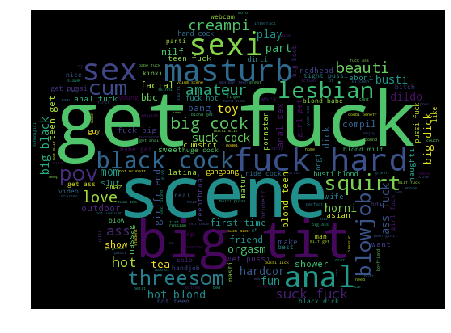

In [0]:
titles = data["title"]

#response = requests.get("https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png")
response = requests.get("http://www.shapecollage.com/shapes/mask-cloud.png")
#response = requests.get("https://st2.depositphotos.com/1813303/5779/v/950/depositphotos_57793127-stock-illustration-silhouette-of-bottle-vector.jpg")
img = Image.open(BytesIO(response.content))

mask = np.array(img)

text = ""
for i in titles:
  words = i.lower()
  for word in words.split(" "):
    word = re.sub('[^a-zA-Z]+', '', word)
    word = stem(word)
    text += " " + word

generate_wordcloud(text)

##WordCloud in high voting

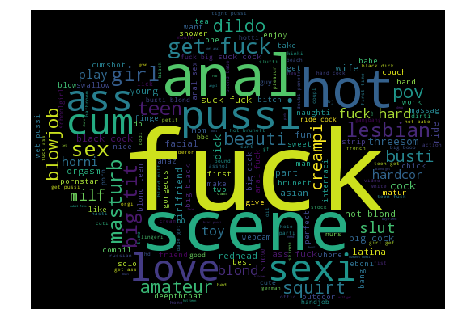

In [0]:
titles = data["title"]

response = requests.get("http://www.shapecollage.com/shapes/mask-cloud.png")
#response = requests.get("https://st2.depositphotos.com/1813303/5779/v/950/depositphotos_57793127-stock-illustration-silhouette-of-bottle-vector.jpg")
img = Image.open(BytesIO(response.content))

mask = np.array(img)

text = ""
for i in range(len(data)):
  if int(data["voting"][i]) > 80:
    words = titles[i].lower()
    for word in words.split(" "):
      word = re.sub('[^a-zA-Z]+', '', word)
      word = stem(word)
      text += " " + word

generate_wordcloud(text)

##WordCloud for low voting

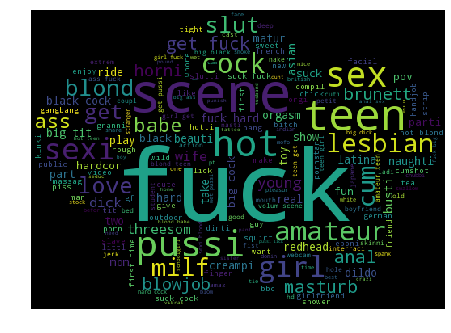

In [0]:
titles = data["title"]

response = requests.get("http://www.shapecollage.com/shapes/mask-cloud.png")
#response = requests.get("https://st2.depositphotos.com/1813303/5779/v/950/depositphotos_57793127-stock-illustration-silhouette-of-bottle-vector.jpg")
img = Image.open(BytesIO(response.content))

mask = np.array(img)

text = ""
for i in range(len(data)):
  if int(data["voting"][i]) < 70:
    words = titles[i].lower()
    for word in words.split(" "):
      word = re.sub('[^a-zA-Z]+', '', word)
      word = stem(word)
      text += " " + word

generate_wordcloud(text)

##WordCloud from tags

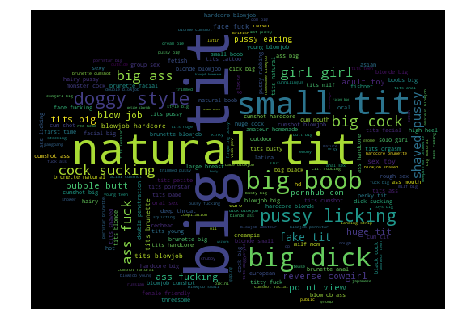

In [0]:
response = requests.get("http://www.shapecollage.com/shapes/mask-cloud.png")
img = Image.open(BytesIO(response.content))
mask = np.array(img)

tagText = ""

for i in data["tags"]:
  x = str(i).split("__")
  for j in x:
    tagText += " " + j.strip().strip('-').strip('.')

generate_wordcloud(tagText)

#T tests


In [0]:

# Create sample data.
low_votes = [data["voting"][i] for i in range(len(data)) if data["quality"][i] == "Quality.LOW"]
hd_votes = [data["voting"][i] for i in range(len(data)) if data["quality"][i] == "Quality.HD"]

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(low_votes, hd_votes, equal_var=False)
print("Low quality votes <=> HD quality votes")
print("ttest_ind:            t = %g  p = %g" % (t, p))

Low quality votes <=> HD quality votes
ttest_ind:            t = 81.211  p = 0


In [0]:
teen_votes = [data["voting"][i] for i in range(len(data)) if data["category_Pornstar"][i] == 1]
pronstar_votes = [data["voting"][i] for i in range(len(data)) if data["category_Teen"][i] == 1]

t, p = ttest_ind(teen_votes, pronstar_votes, equal_var=False)

print("Teen votes <=> Pronstar votes")
print("ttest_ind:            t = %g  p = %g" % (t, p))

#print(data.columns.values)

Teen votes <=> Pronstar votes
ttest_ind:            t = 43.6572  p = 0


# Common category pairs

First, we collect the frequently used category labels

In [0]:
cats = [(i,stat.mean([data["voting"][j] for j in range(len(data)) if data[i][j] != 0])) for i in list(data) if "category_" in i and sum(data[i]) > 10000]
category_labels = [key for (key, value) in cats]

##Display most frequently category pairs: (it could take long time)


In [0]:
cat_pairs = dict()

#category_labels = [cat for cat in data.columns.values if "category_" in cat]
for category1 in category_labels:
  for category2 in category_labels:
    if category1 != category2:
      count = 0
      for i in range(100):#len(data)):
        if data[category1][i] == 1 and data[category2][i] == 1:
          count += 1
      key = category1[9:] + " + " + category2[9:]
      cat_pairs[key] = count

for key, value in sorted(cat_pairs.items(), key=operator.itemgetter(1), reverse=True):
  print("%s: %s" % (key, value))

Pornstar + Big Tits: 7
Big Tits + Pornstar: 7
Big Tits + Anal: 4
Anal + Big Tits: 4
Babe + Hardcore: 4
Hardcore + Babe: 4
Pornstar + Anal: 3
Pornstar + Babe: 3
Anal + Pornstar: 3
Anal + Blowjob: 3
Babe + Pornstar: 3
Blowjob + Anal: 3
Pornstar + Hardcore: 2
Teen + Masturbation: 2
Big Tits + Babe: 2
Big Tits + Hardcore: 2
Babe + Big Tits: 2
Babe + Toys: 2
Babe + Blowjob: 2
Hardcore + Pornstar: 2
Hardcore + Big Tits: 2
Masturbation + Teen: 2
Toys + Babe: 2
Blowjob + Babe: 2
Pornstar + Teen: 1
Pornstar + Brunette: 1
Pornstar + POV: 1
Pornstar + Threesome: 1
Pornstar + Big Dick: 1
Amateur + MILF: 1
Amateur + POV: 1
Amateur + Masturbation: 1
Amateur + Toys: 1
Teen + Pornstar: 1
Teen + Anal: 1
Anal + Teen: 1
Anal + Babe: 1
Anal + Hardcore: 1
Anal + POV: 1
Anal + Big Dick: 1
Babe + Anal: 1
Hardcore + Anal: 1
Hardcore + Threesome: 1
MILF + Amateur: 1
MILF + Blonde: 1
Brunette + Pornstar: 1
Brunette + Toys: 1
POV + Pornstar: 1
POV + Amateur: 1
POV + Anal: 1
POV + Blonde: 1
Blonde + MILF: 1
Blond

##Generate matrix of the category pairs (it could take long time)

In [0]:
print("Generate common-matrix")

matrix = [[0 for x in range(len(category_labels))] for y in range(len(category_labels))]
i_index = 0
for category1 in category_labels:
  j_index = 0
  for category2 in category_labels:
    count = 0
    for i in range(len(data)):
      if data[category1][i] == 1 and data[category2][i] == 1:
        count += 1
    matrix[i_index][j_index] = count
    j_index += 1
  i_index += 1

print("Done.")

Generate common-matrix
Done.


##Write pair matrix to file

In [0]:
if not os.path.isfile('category_pair_matrix.txt'):
  f = open('category_pair_matrix.txt','w')
  for i in range(len(matrix)):
    for j in range(len(matrix[i])):
      f.write(str(matrix[i][j]) + " ")
    f.write("\n")
  f.close()
else:
  print("Matrix file exist!")

##Generate matrix of the voting of category pairs (it could take long time)

In [0]:
avg_vote_matrix = [[0 for x in range(len(category_labels))] for y in range(len(category_labels))]
for i in range(len(matrix)):
  for j in range(len(matrix)):
    avg_vote_matrix[i][j] = stat.mean( 
        [data["voting"][k] for k in range(len(data["voting"])) 
         if data[category_labels[i]][k] == 1
         and data[category_labels[j]][k] == 1] 
    )

##Write voting matrix to file

In [0]:
if not os.path.isfile('category_pair_votes_matrix.txt'):
  f = open('category_pair_votes_matrix.txt','w')
  for i in range(len(avg_vote_matrix)):
    for j in range(len(avg_vote_matrix[i])):
      f.write(str(avg_vote_matrix[i][j]) + " ")
    f.write("\n")
  f.close()
else:
  print("Matrix file exist!")

##Now we can read matrices from file

In [0]:
matrix = []
with open('category_pair_matrix.txt') as f:
    lines = f.readlines()
    for line in lines:
      matrix += [[int(i) for i in line.split()]]
      
avg_vote_matrix = []
with open('category_pair_votes_matrix.txt') as f:
    lines = f.readlines()
    for line in lines:
      avg_vote_matrix += [[float(i) for i in line.split()]]

FileNotFoundError: ignored

##Now let's check the heatmaps

Text(0.5,1,'Category pair occurences')

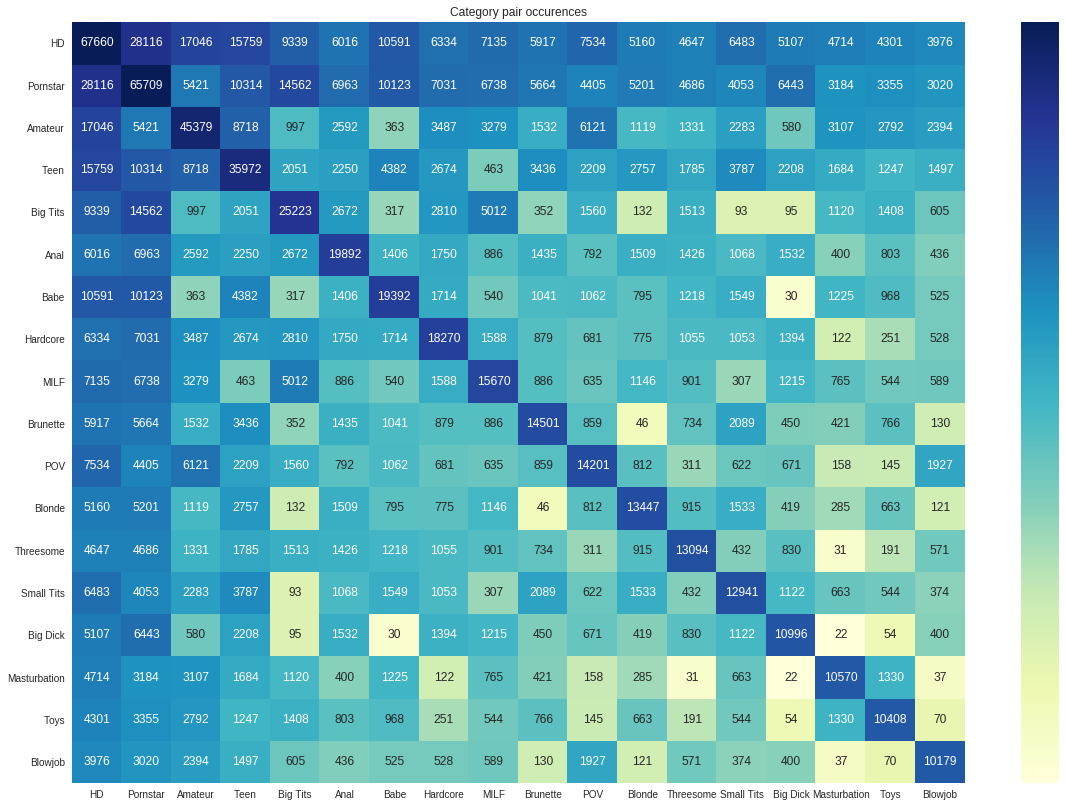

In [0]:
np_matrix = np.array(matrix)
df_cm = pd.DataFrame(matrix, index = [i[9:] for i in category_labels],
                  columns = [i[9:] for i in category_labels])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", norm=LogNorm(np_matrix.min(), np_matrix.max())).set_title("Category pair occurences")

Text(0.5,1,'Category pair occurences')

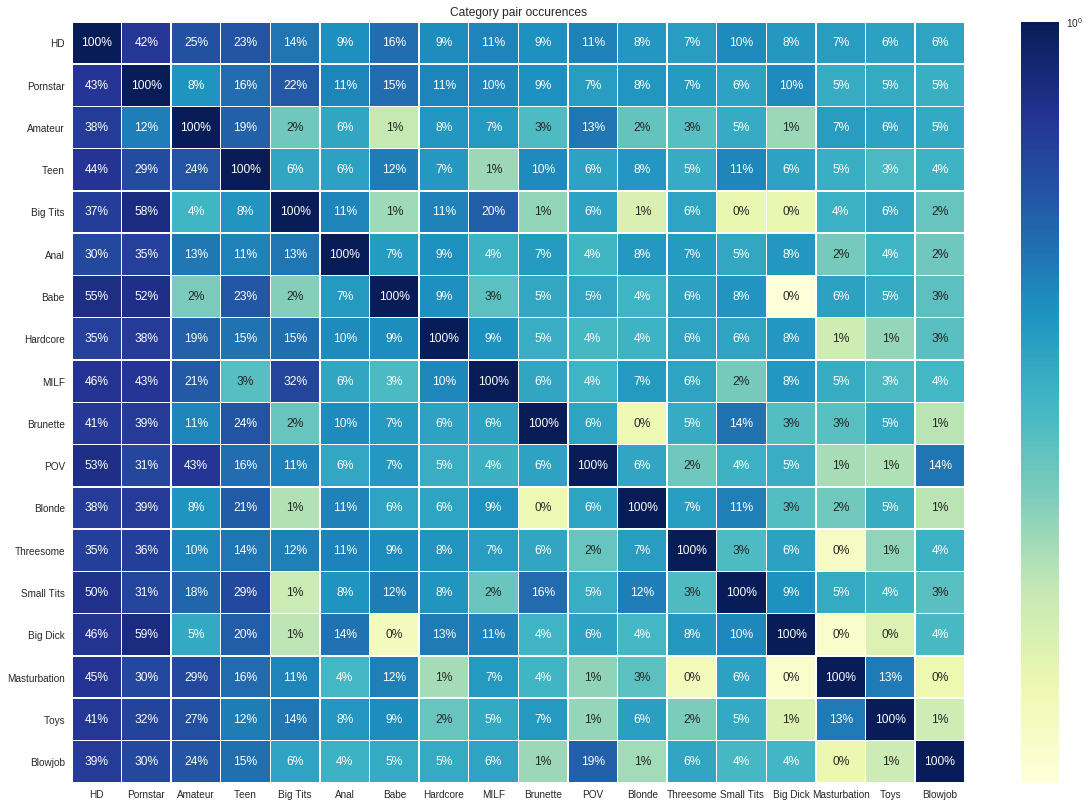

In [0]:
norm_matrix = [[0 for x in range(len(category_labels))] for y in range(len(category_labels))]
for i in range(len(matrix)):
  for j in range(len(matrix)):
    norm_matrix[i][j] = matrix[i][j] / matrix[i][i]
    
df_cm = pd.DataFrame(norm_matrix, index = [i[9:] for i in category_labels],
                  columns = [i[9:] for i in category_labels])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, fmt=".0%", linewidths=.5, cmap="YlGnBu", norm=LogNorm(0,1)).set_title("Category pair occurences")

In [0]:
avg_np_matrix = np.array(avg_vote_matrix)

df_cm = pd.DataFrame(avg_vote_matrix, index = [i[9:] for i in category_labels],
                  columns = [i[9:] for i in category_labels])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, linewidths=.5, cmap="YlGnBu", norm=LogNorm(avg_np_matrix.min(),avg_np_matrix.max())).set_title('Average votings per categories')

#Voting histograms by categories

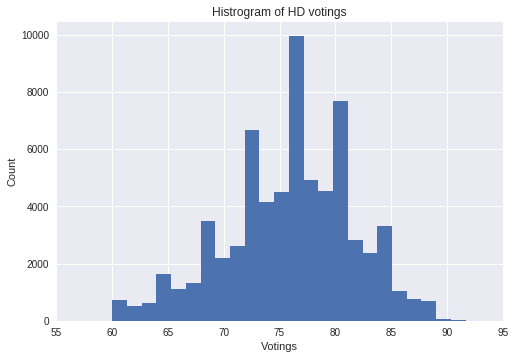

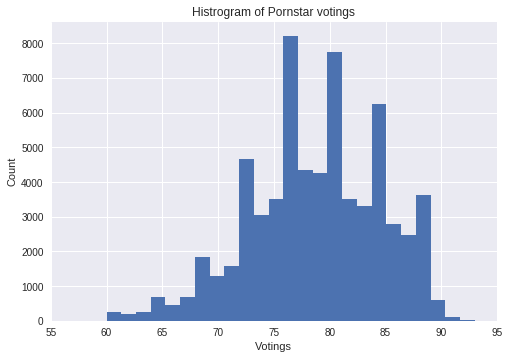

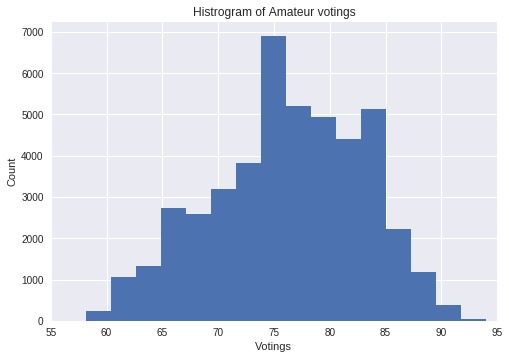

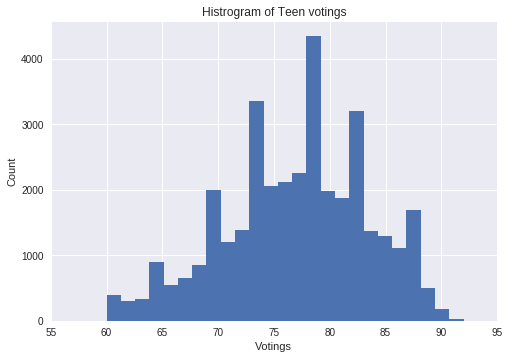

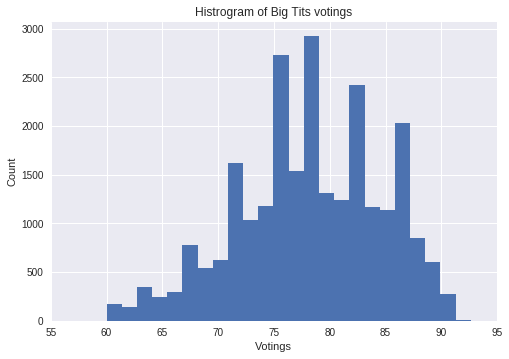

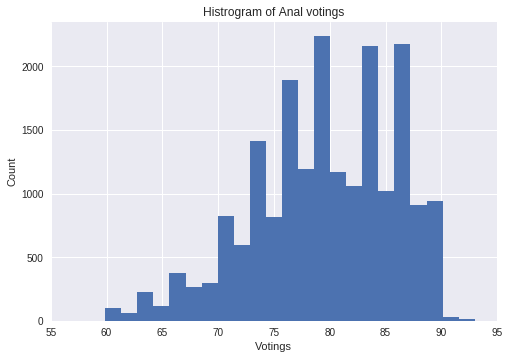

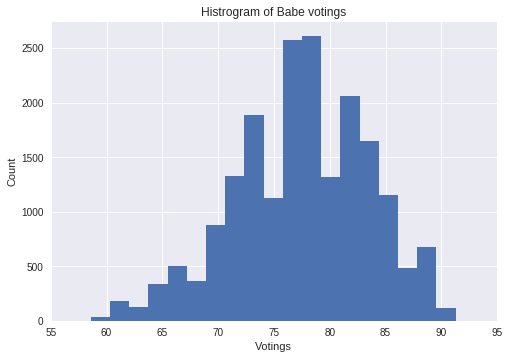

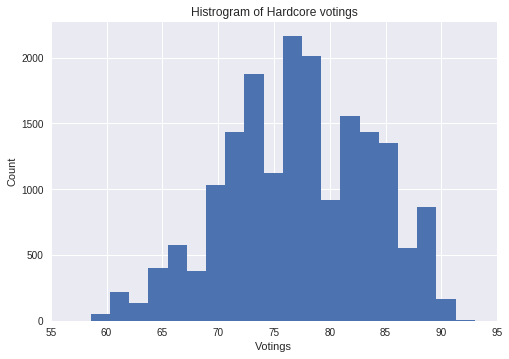

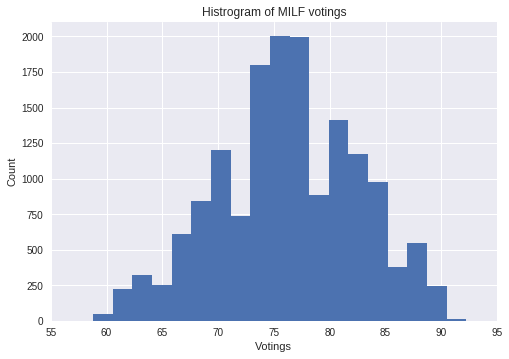

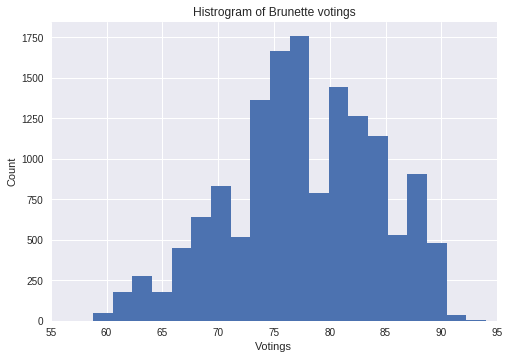

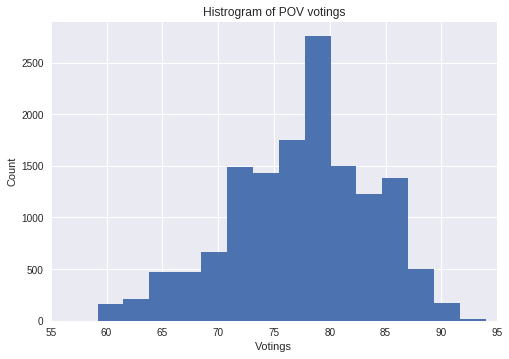

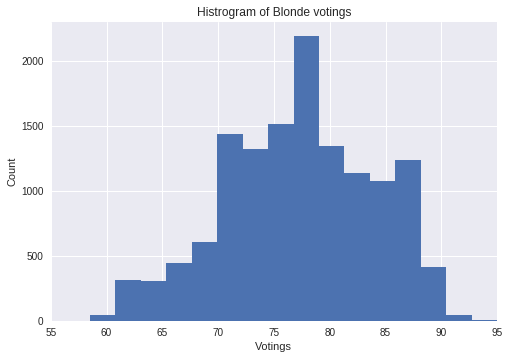

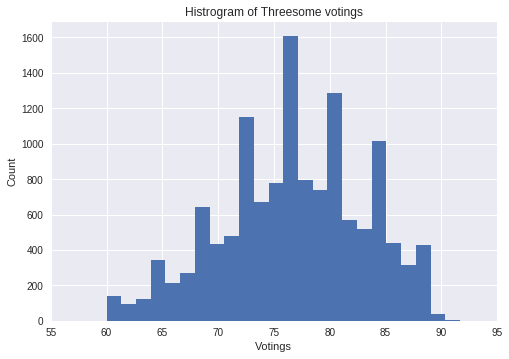

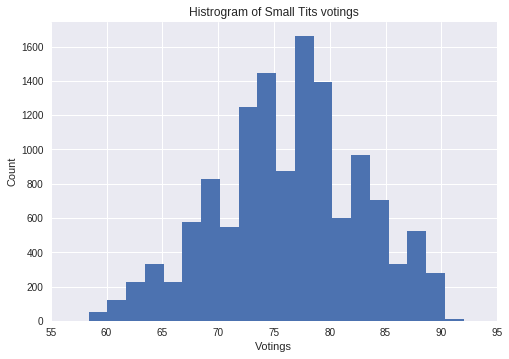

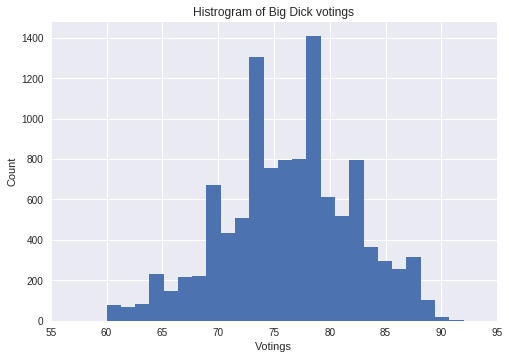

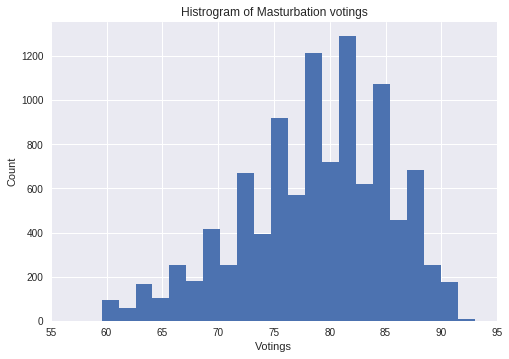

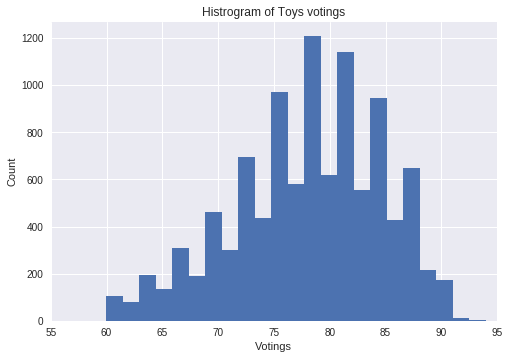

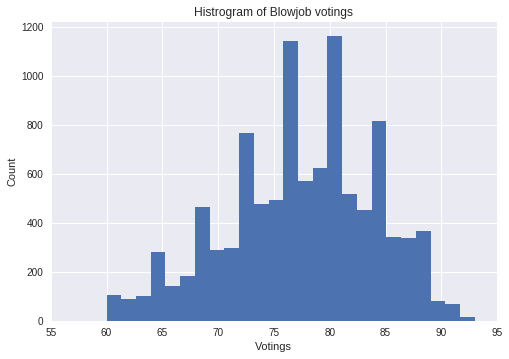

In [0]:
for category in category_labels:
  x = [data["voting"][i] for i in range(len(data["voting"])) if data[category][i] == 1]
  plt.hist(x, bins=25)
  plt.title('Histrogram of ' + category[9:] + ' votings')
  plt.xlabel('Votings')
  plt.ylabel('Count');
  plt.xlim(55, 95)
  plt.show()

#HD categories

In [0]:
for category in category_labels:
  low_votes = [data["voting"][i] for i in range(len(data)) if data["quality"][i] == "Quality.LOW" and data[category][i] == 1]
  hd_votes = [data["voting"][i] for i in range(len(data)) if data["quality"][i] == "Quality.HD" and data[category][i] == 1]

  # Use scipy.stats.ttest_ind.
  t, p = ttest_ind(low_votes, hd_votes, equal_var=False)
  print("Category: %s" % category[9:])
  if(p < 0.05):
    if(stat.mean(low_votes) > stat.mean(hd_votes)):
      print("\tLow quality is voted better")
    else:
      print("\tHD quality is voted better")
  else:
    print("\tThere was not found significant difference between qualities")
  print("\tttest_ind:  t = %g  p = %s" % (t, '{:.5f}'.format(p)))

Category: HD
	There was not found significant difference between qualities
	ttest_ind:  t = -1.93625  p = 0.05747
Category: Pornstar
	Low quality is voted better
	ttest_ind:  t = 85.6979  p = 0.00000
Category: Amateur
	Low quality is voted better
	ttest_ind:  t = 7.97472  p = 0.00000
Category: Teen
	Low quality is voted better
	ttest_ind:  t = 31.6267  p = 0.00000
Category: Big Tits
	Low quality is voted better
	ttest_ind:  t = 53.0709  p = 0.00000
Category: Anal
	Low quality is voted better
	ttest_ind:  t = 44.4172  p = 0.00000
Category: Babe
	Low quality is voted better
	ttest_ind:  t = 17.8946  p = 0.00000
Category: Hardcore
	Low quality is voted better
	ttest_ind:  t = 39.3492  p = 0.00000
Category: MILF
	Low quality is voted better
	ttest_ind:  t = 23.7247  p = 0.00000
Category: Brunette
	Low quality is voted better
	ttest_ind:  t = 37.8345  p = 0.00000
Category: POV
	Low quality is voted better
	ttest_ind:  t = 19.7861  p = 0.00000
Category: Blonde
	Low quality is voted better
	t

#Treemap

##Calculate necessary data (it could take long time)

In [0]:
cat_names = []
avg_cat_votes = []
count_category = []
avg_cat_views = []
avg_cat_length = []
for category in category_labels:
  cat_names += [ category[9:] ]
  avg_cat_votes += [ stat.mean([data["voting"][i] for i in range(len(data["voting"])) if data[category][i] == 1]) ]
  count_category += [ len([i for i in range(len(data["voting"])) if data[category][i] == 1]) ]
  avg_cat_views += [ stat.mean([data["views"][i] for i in range(len(data["views"])) if data[category][i] == 1]) ]
  avg_cat_length += [ stat.mean([data["length"][i] for i in range(len(data["length"])) if data[category][i] == 1]) ]


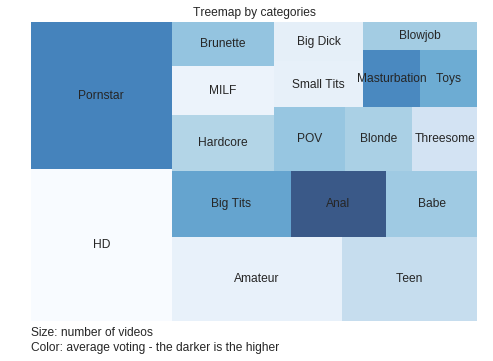

In [0]:
cmap = matplotlib.cm.Blues
mini=min(avg_cat_votes)
maxi=max(avg_cat_votes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in avg_cat_votes]

squarify.plot(sizes=count_category, alpha=.8, color=colors, label=cat_names)
plt.axis('off')
plt.title("Treemap by categories")
plt.text(0, -5, 'Size: number of videos')
plt.text(0, -10,'Color: average voting - the darker is the higher')
plt.show()

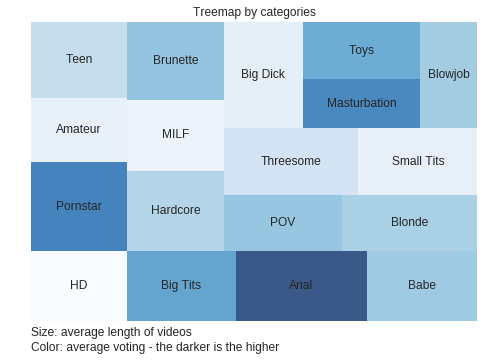

In [0]:
cmap = matplotlib.cm.Blues
mini=min(avg_cat_votes)
maxi=max(avg_cat_votes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in avg_cat_votes]

squarify.plot(sizes=avg_cat_length, alpha=.8, color=colors, label=cat_names)
plt.axis('off')
plt.title("Treemap by categories")
plt.text(0, -5, 'Size: average length of videos')
plt.text(0, -10,'Color: average voting - the darker is the higher')
plt.show()

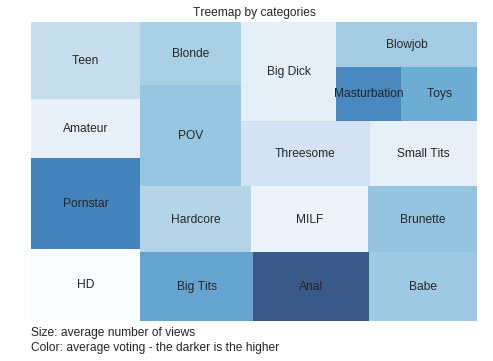

In [0]:
cmap = matplotlib.cm.Blues
mini=min(avg_cat_votes)
maxi=max(avg_cat_votes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in avg_cat_votes]

squarify.plot(sizes=avg_cat_views, alpha=.8, color=colors, label=cat_names)
plt.axis('off')
plt.title("Treemap by categories")
plt.text(0, -5, 'Size: average number of views')
plt.text(0, -10,'Color: average voting - the darker is the higher')
plt.show()

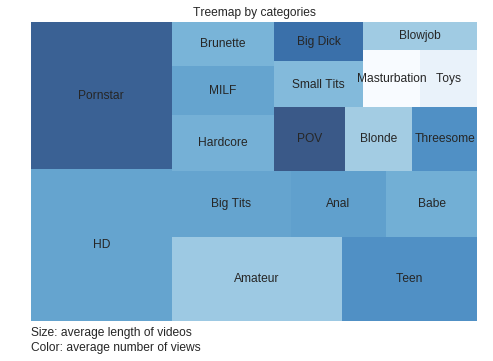

In [0]:
cmap = matplotlib.cm.Blues
mini=min(avg_cat_views)
maxi=max(avg_cat_views)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in avg_cat_views]

squarify.plot(sizes=count_category, alpha=.8, color=colors, label=cat_names)
plt.axis('off')
plt.title("Treemap by categories")
plt.text(0, -5, 'Size: average length of videos')
plt.text(0, -10,'Color: average number of views')
plt.show()

#Regression

In [0]:
data_sample = data.sample(frac=0.01, replace=True)
sn.set(color_codes=True)

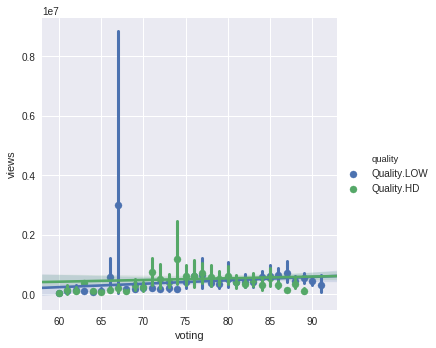

In [0]:

sn.lmplot(x="voting", y="views", data=data_sample, hue="quality", x_estimator=np.mean);

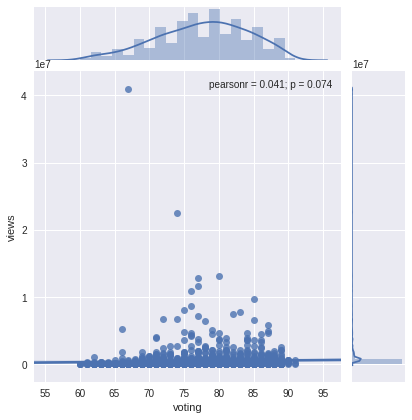

In [0]:
sn.jointplot(x="voting", y="views", data=data_sample, kind="reg");

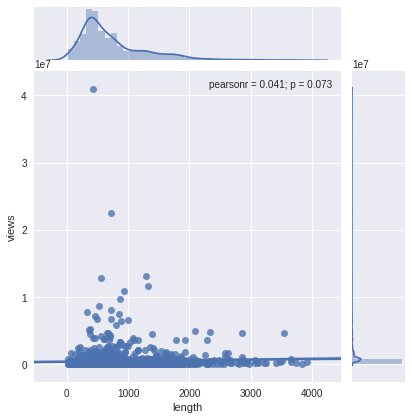

In [0]:
sn.jointplot(x="length", y="views", data=data_sample, kind="reg");